In [1]:
! pip install folium && pip install markupsafe==2.0.1

In [2]:
import os
import glob
import numpy as np
import rasterio as rio
import geopandas as gpd
import folium
import matplotlib.pyplot as pyplt

proj_create: Open of /opt/conda/share/proj failed
proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode
proj_create: Open of /opt/conda/share/proj failed
proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ztdof5gi because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
# Read flood image
with rio.open('/home/olyg/Palamas/Results/Flood_map_Palamas.tif') as src:
    boundary = src.bounds
    img = src.read(1)
    metadata = src.meta


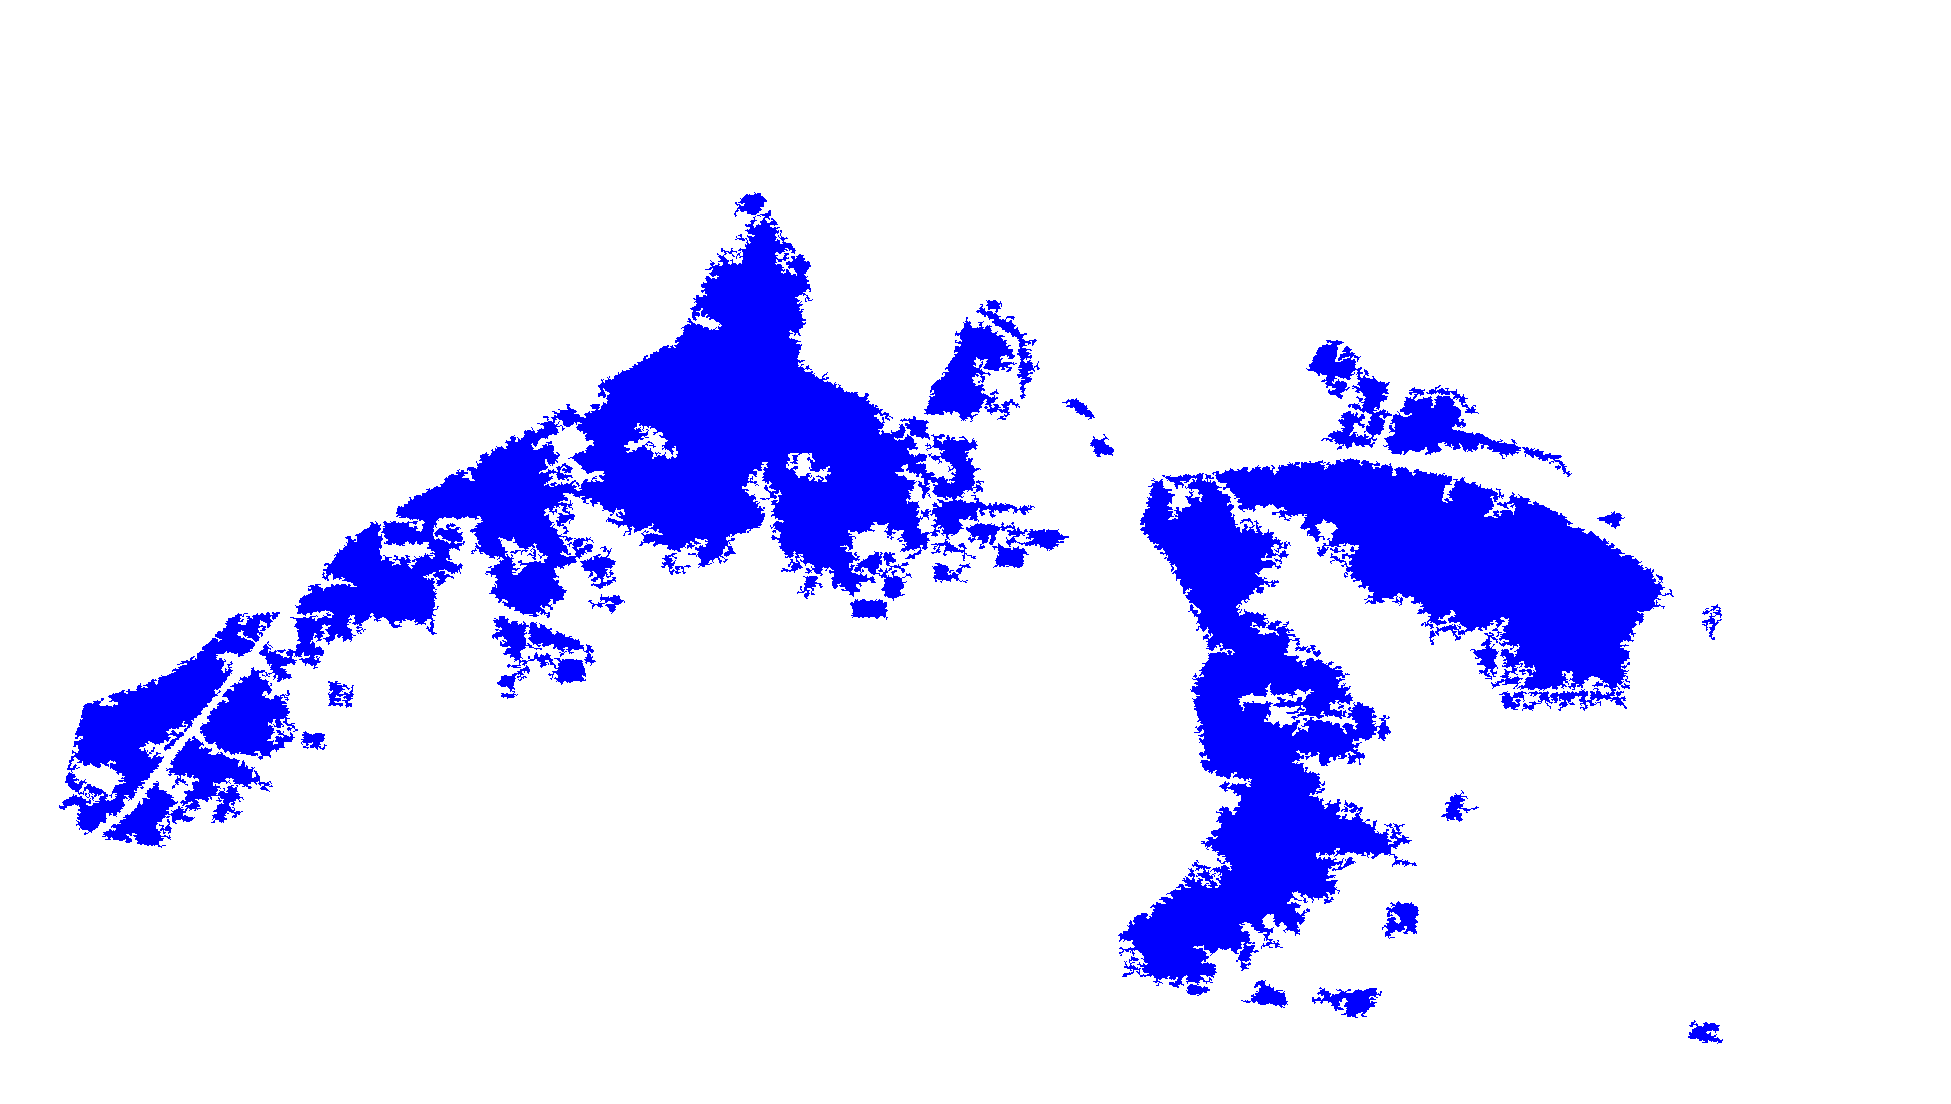

In [4]:
# Create a map
m = folium.Map(tiles='OpenStreetMap', location=[39.50, 22.10], zoom_start = 13)

# Add satellite basemap
tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(m)

map_bounds = [[boundary.bottom, boundary.left], 
              [boundary.top, boundary.right]]

# Add flood image
raster_to_coloridx = {1: (0.0, 0.0, 1.0, 1.0),
                      0: (0.0, 0.0, 0.0, 0.0)}
m.add_child(folium.raster_layers.ImageOverlay(img, 
                                             opacity=0.5,
                                             bounds=map_bounds,
                                             colormap=lambda x: raster_to_coloridx[x]))


In [5]:
# Read vector delineated crop field boundaries
bounds_fpath = glob.glob(os.path.join('/home/olyg/Palamas/Results_crop_delineation', 'flooded_fields__*.shp'))[0]
bounds = gpd.read_file(bounds_fpath)
bounds = bounds.to_crs(4326)

proj_create: Open of /opt/conda/share/proj failed
proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode



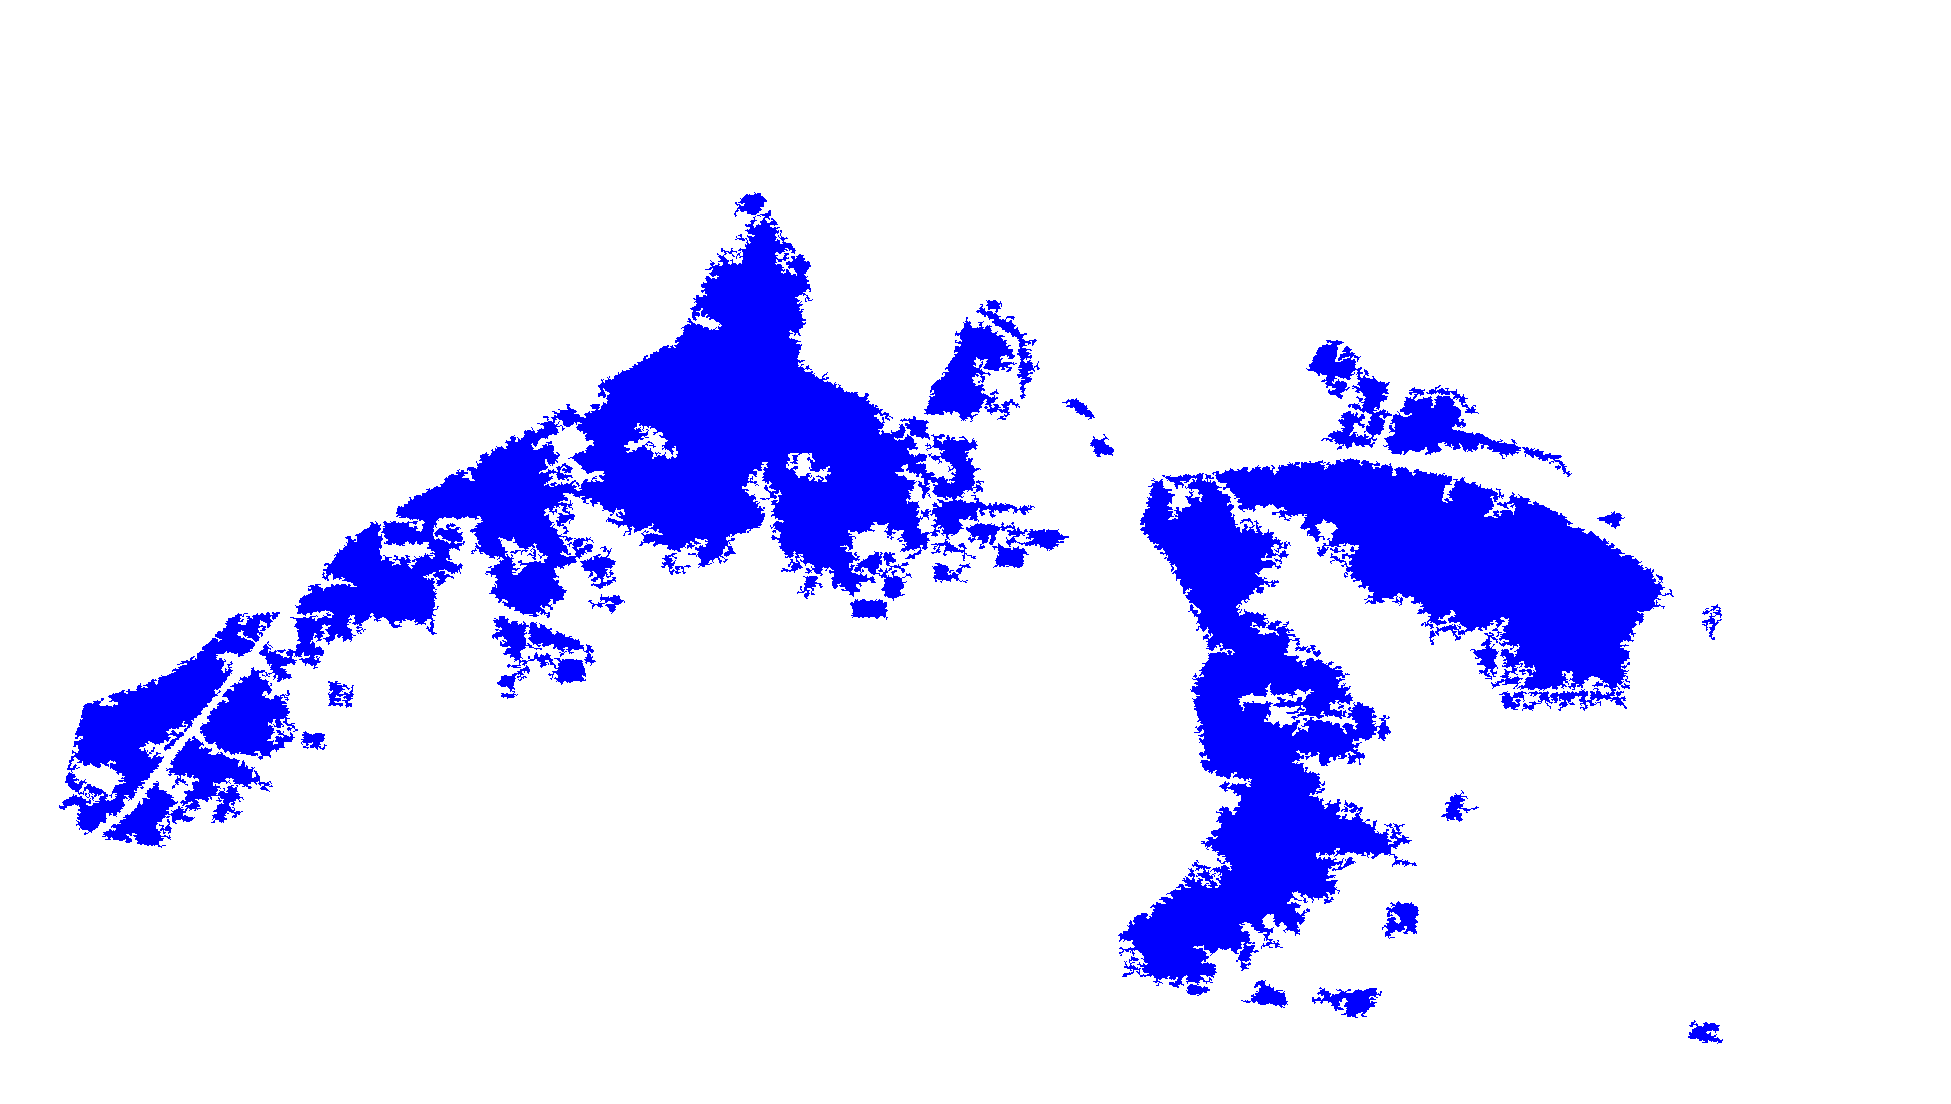

In [7]:
def style_fn(feature):
    vector_to_coloridx = {
        'cultivated': {'fillColor':'#008000', 'fillOpacity':0.6, 'color':'#008000'},
        'not_cultivated': {'fillColor':'#FF0000', 'fillOpacity':0.6, 'color':'#FF0000'}
    }
    cultivation_status = feature['properties']['status']
    return vector_to_coloridx[cultivation_status]

m.add_child(folium.GeoJson(bounds.__geo_interface__,
                           style_function=style_fn,))
